In [1]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.gam import gam
from algorithms.lv_hba import lv_hba
from algorithms.ours import ours

from utils import load_diabetes, train_val_test_split

In [2]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['axes.unicode_minus']=False

# Loading Data

In [3]:
data = load_diabetes()

n_train = 500
n_val = 150

# Execution

In [4]:
epochs = 80
seeds = 10

In [5]:
hparams = {
    'lv_hba': {
        'alpha': 0.01,
        'gama1': 0.1,
        'gama2': 0.1,
        'yita': 0.001
    },
    'gam': {
        'alpha': 0.05,
        'epsilon': 0.005
    },
    'ours': {
        'gam': 12,
        'eta': 0.01
    }
}

In [6]:
metrics = {}
variables = {}

algs = ['ours', 'lv_hba', 'gam']

for a in algs:
    metrics[a] = []
    variables[a] = []

for seed in range(seeds):   

    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=False)
        metrics[alg].append(metrics_seed)
        variables[alg].append(variables_seed)
    print("DONE")

Starting with algorithm: ours - 1 2 3 4 5 6 

/home/vtenorio/.local/lib/python3.8/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


7 8 9 10 DONE
Starting with algorithm: lv_hba - 1 2 3 4 5 6 7 8 9 10 DONE
Starting with algorithm: gam - 1 2 3 4 5 6 7 8 9 10 DONE


# Evaluation

In [7]:
metrics_lvhba = metrics['lv_hba']
metrics_gam = metrics['gam']
metrics_ours = metrics['ours']

axis_lvhba = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_lvhba]).mean(0)
axis_gam = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_gam]).mean(0)
axis_ours = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_ours]).mean(0)

axis_iter = np.arange(epochs)

In [8]:
train_acc_lvhba = np.array([[x['train_acc'] for x in metrics] for metrics in metrics_lvhba])
train_acc_ga = np.array([[x['train_acc'] for x in metrics] for metrics in metrics_gam])
train_acc_ours = np.array([[x['train_acc_F'] for x in metrics] for metrics in metrics_ours])

val_acc_lvhba = np.array([[x['val_acc'] for x in metrics] for metrics in metrics_lvhba])
val_acc_ga = np.array([[x['val_acc'] for x in metrics] for metrics in metrics_gam])
val_acc_ours = np.array([[x['val_acc_F'] for x in metrics] for metrics in metrics_ours])

test_acc_lvhba = np.array([[x['test_acc'] for x in metrics] for metrics in metrics_lvhba])
test_acc_ga = np.array([[x['test_acc'] for x in metrics] for metrics in metrics_gam])
test_acc_ours = np.array([[x['test_acc_F'] for x in metrics] for metrics in metrics_ours])

In [9]:
val_loss_lvhba = np.array([[x['val_loss'] for x in metrics] for metrics in metrics_lvhba])[:,1:]
val_loss_ga = np.array([[x['val_loss'] for x in metrics] for metrics in metrics_gam])[:,1:]
val_loss_ours = np.array([[x['val_loss_F'] for x in metrics] for metrics in metrics_ours])[:,1:]

test_loss_lvhba = np.array([[x['test_loss'] for x in metrics] for metrics in metrics_lvhba])[:,1:]
test_loss_ga = np.array([[x['test_loss'] for x in metrics] for metrics in metrics_gam])[:,1:]
test_loss_ours = np.array([[x['test_loss_F'] for x in metrics] for metrics in metrics_ours])[:,1:]

Text(0, 0.5, 'Accuracy')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


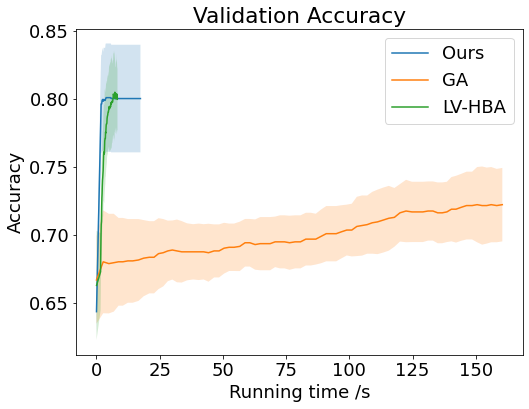

In [10]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,val_acc_ours.mean(0),'-',label="Ours")
plt.fill_between(axis_ours,val_acc_ours.mean(0)-val_acc_ours.std(0),val_acc_ours.mean(0)+val_acc_ours.std(0),alpha=0.2)

plt.plot(axis_gam,val_acc_ga.mean(0),'-',label="GA")
plt.fill_between(axis_gam,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

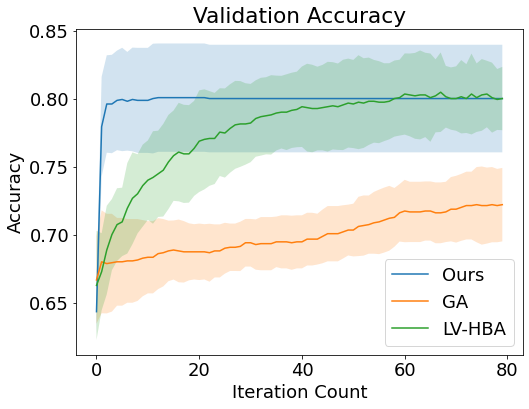

In [11]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_ga.shape[1])

plt.plot(axis_iter,val_acc_ours.mean(0),'-',label="Ours")
plt.fill_between(axis_iter,val_acc_ours.mean(0)-val_acc_ours.std(0),val_acc_ours.mean(0)+val_acc_ours.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_ga.mean(0),'-',label="GA")
plt.fill_between(axis_iter,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

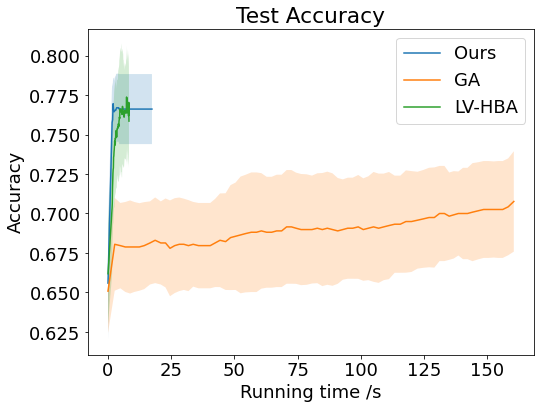

In [12]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,test_acc_ours.mean(0),'-',label="Ours")
plt.fill_between(axis_ours,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GA")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

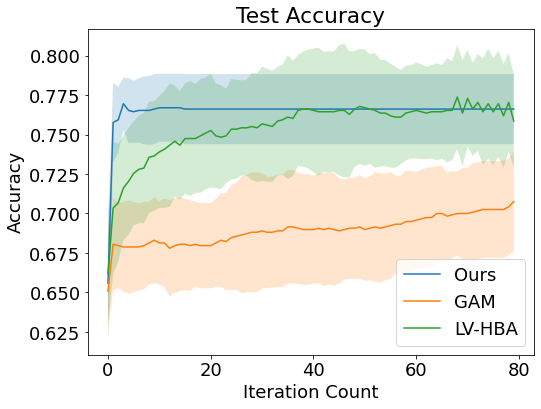

In [13]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_ours.mean(0),'-',label="Ours")
plt.fill_between(axis_iter,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")

plt.savefig('../results/hyperparam_opt/test_accuracy.pdf', bbox_inches="tight")

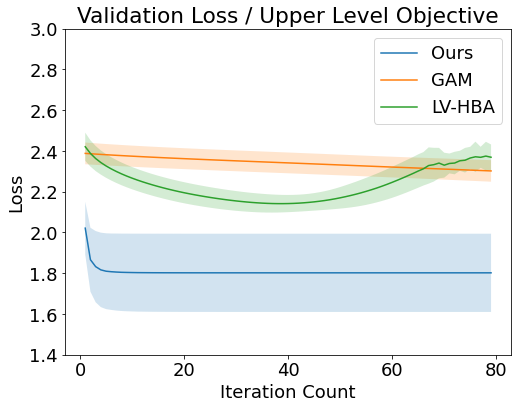

In [14]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis[1:],val_loss_ours.mean(0),'-',label="Ours")
plt.fill_between(iter_axis[1:],val_loss_ours.mean(0)-val_loss_ours.std(0),val_loss_ours.mean(0)+val_loss_ours.std(0),alpha=0.2)

plt.plot(iter_axis[1:],val_loss_ga.mean(0),'-',label="GAM")
plt.fill_between(iter_axis[1:],val_loss_ga.mean(0)-val_loss_ga.std(0),val_loss_ga.mean(0)+val_loss_ga.std(0),alpha=0.2)

plt.plot(iter_axis[1:],val_loss_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(iter_axis[1:],val_loss_lvhba.mean(0)-val_loss_lvhba.std(0),val_loss_lvhba.mean(0)+val_loss_lvhba.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.4,3.])

plt.savefig('../results/hyperparam_opt/upper_obj.pdf', bbox_inches="tight")

(1.4, 3.0)

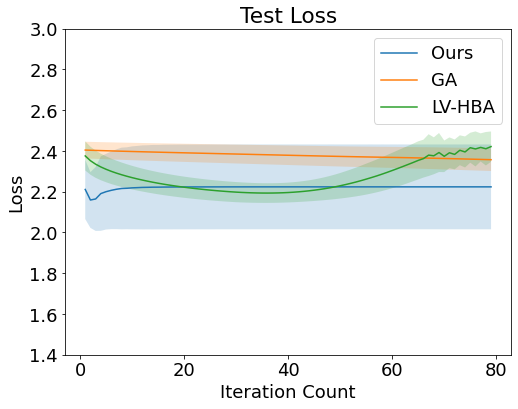

In [15]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter[1:],test_loss_ours.mean(0),'-',label="Ours")
plt.fill_between(axis_iter[1:],test_loss_ours.mean(0)-test_loss_ours.std(0),test_loss_ours.mean(0)+test_loss_ours.std(0),alpha=0.2)

plt.plot(axis_iter[1:],test_loss_ga.mean(0),'-',label="GA")
plt.fill_between(axis_iter[1:],test_loss_ga.mean(0)-test_loss_ga.std(0),test_loss_ga.mean(0)+test_loss_ga.std(0),alpha=0.2)

plt.plot(axis_iter[1:],test_loss_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter[1:],test_loss_lvhba.mean(0)-test_loss_lvhba.std(0),test_loss_lvhba.mean(0)+test_loss_lvhba.std(0),alpha=0.2)

plt.legend()
plt.title('Test Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")
plt.ylim([1.4,3.])